In [1]:
# import Pandas
import pandas as pd
col_names = ['pregnant','glucose','bp','skin','insulin','bmi','pedigree','age','label']

# load dataset
pima = pd.read_csv("diabetes.csv", header=None, names= col_names,skiprows=1)

# Convert any non-numeric values to NaN
pima = pima.apply(pd.to_numeric,errors='coerce')

# drop rows with any NaN values
pima.dropna(inplace=True)

pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
# selecting feature
# split dataset in features and target variable
feature_cols = ['pregnant','insulin','bmi','age','glucose','bp','pedigree']
X = pima[feature_cols] # features 
y = pima.label # Target variable


In [3]:
# Splitting the data
# Split X and y into training and testing sets 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=16)

In [4]:
# Model Deployment and Prediction 

# import the class 
from sklearn.linear_model import LogisticRegression 

# instantiate the model (using the default parameters)
Logreg = LogisticRegression(random_state=16)

# fit the model with data
Logreg.fit(X_train, y_train)

y_pred = Logreg.predict(X_test)



C:\Users\vishu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [5]:
# Model Evaluation using Confusion Matrix 
# import the metrics class
from sklearn import metrics 
cnf_matrix = metrics.confusion_matrix(y_test,y_pred)
cnf_matrix

array([[116,   9],
       [ 26,  41]], dtype=int64)

# Visualizing confusion matrix using heatmap


Text(0.5, 257.44, 'Predicted label')

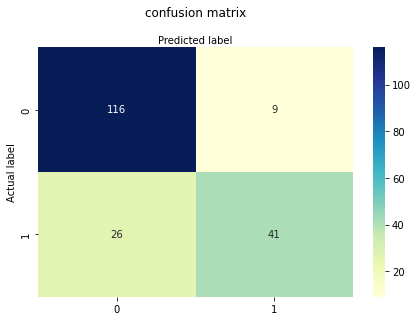

In [8]:
# import required modules
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

class_names=[0,1] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix),annot=True, cmap="YlGnBu",fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

#Text(0.5,257.44,'Predicted label');


In [9]:
# Confusion Matrix Evaluation metrics 
from sklearn.metrics import classification_report
target_names =['without diabetes', 'with diabetes']
print(classification_report(y_test, y_pred,target_names=target_names))

                  precision    recall  f1-score   support

without diabetes       0.82      0.93      0.87       125
   with diabetes       0.82      0.61      0.70        67

        accuracy                           0.82       192
       macro avg       0.82      0.77      0.78       192
    weighted avg       0.82      0.82      0.81       192



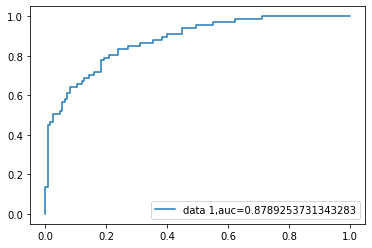

In [11]:
# Roc Curve 
y_pred_proba = Logreg.predict_proba(X_test)[::,1]
fpr,tpr,_= metrics.roc_curve(y_test,y_pred_proba)
auc = metrics.roc_auc_score(y_test,y_pred_proba)
plt.plot(fpr,tpr,label="data 1,auc="+str(auc))
plt.legend(loc=4)
plt.show()